training
running preds
doing plots


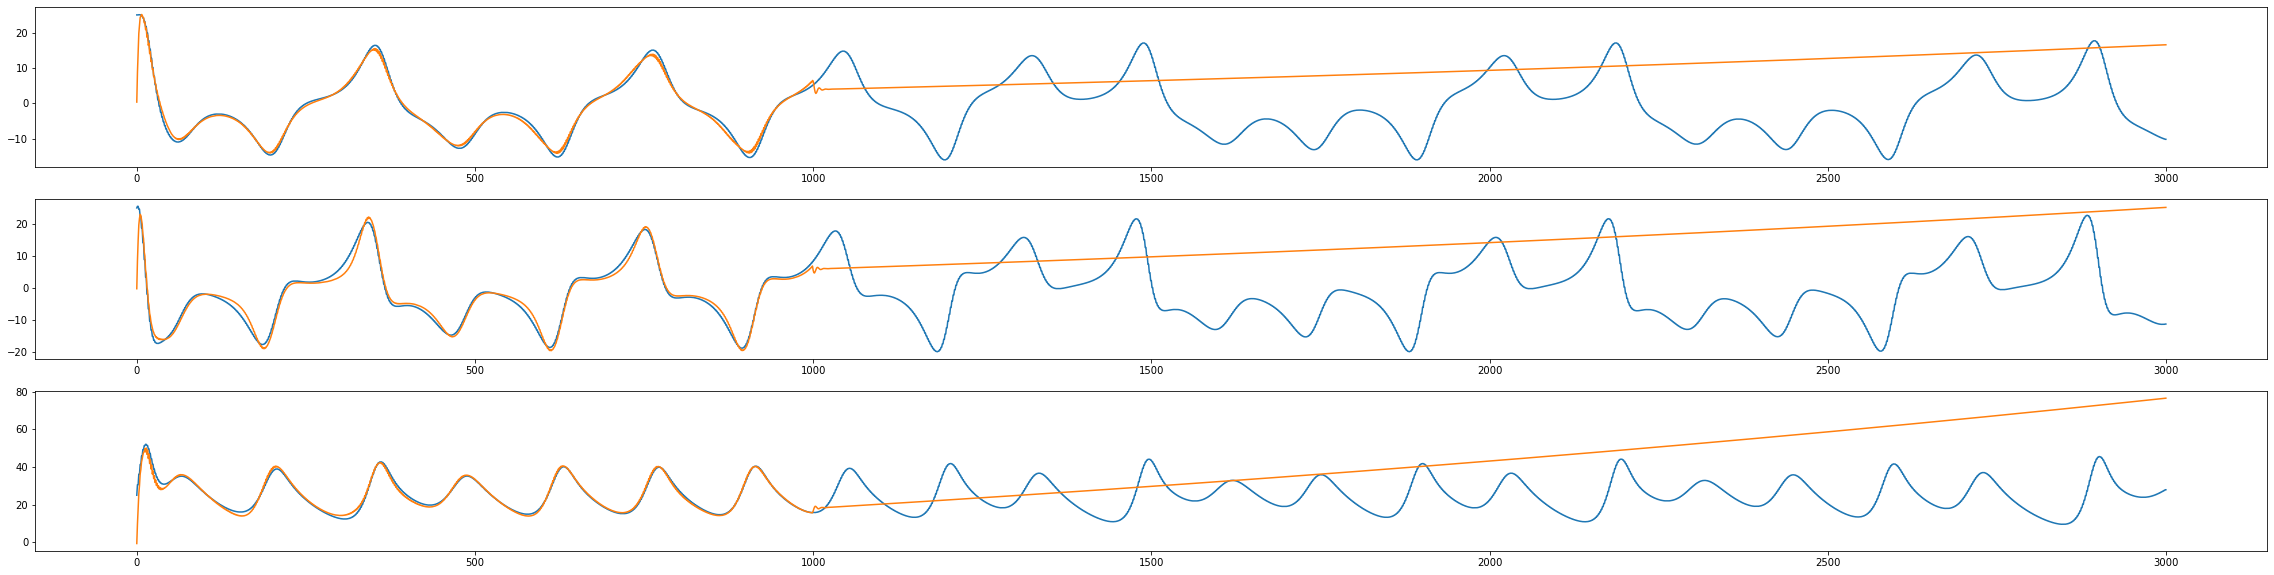

In [62]:
import importlib
import main,input,reservoir,output
importlib.reload(main)
importlib.reload(input)
importlib.reload(reservoir)
importlib.reload(output)


d_r=1000 #dimension of reservoir
tp=1/3 #training portion of lorenz data, always<1. e.g. tp=2/3 means first 2/3 of the generated dynamic system data used for training
lr=.0001 #learning rate for training
#adjust more params of the original dynamic system generated in input.lorenz() of input.py or in any call site of this func.
#most other params are using hyperparam from Hybrid Forecasting of Chaotic Processing paper (2018), Pathak et al..
i,r,o,train,pred,lor=main.main(d_r,tp,lr)

#graph plots x,y,z coordinates from both the generated dynamic system and the RP output against time.
#at ~1000 iterations the input is cut off and obviously the RP model itself blows up from then
#this is not even reproducible as with some random inits this thing blows really up by some extreme hundred-fold

In [63]:
import torch
import numpy
print(o.out(torch.FloatTensor(numpy.zeros(d_r))))
print(train[-3],train[-2],train[-1],pred[0],pred[1])

tensor([ 0.0015, -0.0088,  0.0262], grad_fn=<AddBackward0>)
[ 6.08992   6.446448 15.737928] [ 6.020426   6.5200624 15.743768 ] [ 6.4763327  6.899161  15.684479 ] [ 6.312969   5.5963793 16.571877 ] [ 5.277006   4.8301034 17.758871 ]


[-10.685884 -15.055952  19.209866]
[-10.086015316718104, -16.06462147001514, 19.635897122507956] [-10.086015316718104, -16.06462147001514, 19.635897122507956]


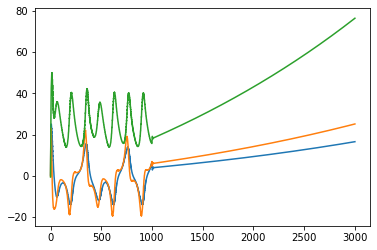

In [64]:
print(train[600])
print(lor[599],lor[600])
import matplotlib.pyplot as plt
#plt.plot(lor)
plt.plot(train+pred)